In [19]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2

In [20]:
image_dims = 128
batch_size = 64

In [21]:
model = Sequential()

model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape= (image_dims, image_dims, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681,537 (6.41 MB)

 Trainable params: 1,681,537 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
input_path = '/content/drive/MyDrive/chest_xray/'

training_data_generator =  ImageDataGenerator(rescale = 1./255,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip= True)

training_gen = training_data_generator.flow_from_directory(directory=input_path+'train',
                                                          target_size=(image_dims,image_dims),
                                                          batch_size=batch_size,
                                                          class_mode='binary')

Found 5216 images belonging to 2 classes.


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
validation_gen = validation_data_generator.flow_from_directory(
    directory= input_path + 'test',
    target_size=(image_dims, image_dims),
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [12]:
#Finding model accuracy
epochs = 10
history = model.fit(
    training_gen,
    steps_per_epoch= len(training_gen),
    epochs=epochs,
    validation_data=validation_gen,
    validation_steps=len(validation_gen)
)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 972s 12s/step - accuracy: 0.8458 - loss: 0.3346 - val_accuracy: 0.8413 - val_loss: 0.4043
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9121 - loss: 0.2110 - val_accuracy: 0.8365 - val_loss: 0.4248
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9188 - loss: 0.2004 - val_accuracy: 0.8878 - val_loss: 0.2667
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9166 - loss: 0.2034 - val_accuracy: 0.8141 - val_loss: 0.5938
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9274 - loss: 0.1851 - val_accuracy: 0.8878 - val_loss: 0.3261
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9298 - loss: 0.1805 - val_accuracy: 0.8782 - val_loss: 0.3852
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9429 - loss: 0.1665 - val_accuracy: 0.8606 - val_loss: 0.4342
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9405 - loss: 0.1613 - val_accuracy: 0.8542 - val_l

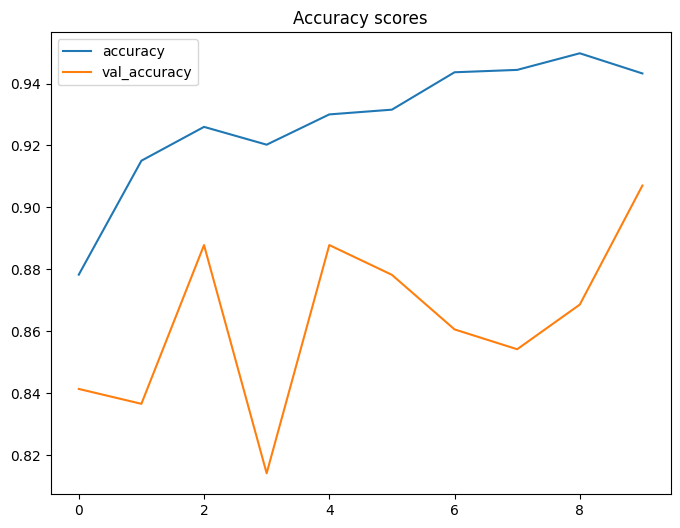

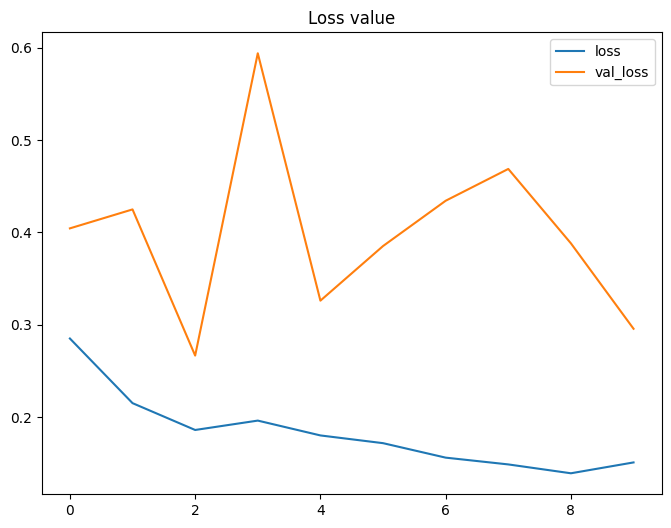

In [14]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [16]:
eval_result = model.evaluate(test_gen)

print('Loss rate at evaluation data:', eval_result[0])
print('Accuracy rate at evaluation data:', eval_result[1])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9016 - loss: 0.3174
Loss rate at evaluation data: 0.29566746950149536
Accuracy rate at evaluation data: 0.9070512652397156


In [18]:
model.save('Pneumonia_Detection_model.keras')